# Analisis del Desempeño de Empleados

## Librerias

In [1]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

In [2]:
# Estilo de graficas
sns.set_theme(style="whitegrid")

In [3]:
# Tamano de las graficas
sns.set(
    rc={
        'figure.figsize':(8, 8)
    }
)

In [4]:
# Carga de datos
data = pd.read_csv('./employees_final_dataset.csv')
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [5]:
# eliminamos la columna employee_id
data = data.drop('employee_id', axis=1)

# Creamos una copia
dataset = data.copy()
dataset

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
17412,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


## Analisis de valores faltantes

### Estadistica basica

In [6]:
# Codigo para correr las funciones de utils.ipynb
%run utils.ipynb

In [7]:
# Registros duplicados
print("Registros Duplicados: " ,data.duplicated().sum())

# Separador
print("="*40)

# Tamano de la data
print("Las dimensiones de la data son: ", data.shape)

Registros Duplicados:  18
Las dimensiones de la data son:  (17417, 12)


In [8]:
# Cantidad de valores completos
v_complet = dataset.missing.number_complete()
v_complet

206870

In [9]:
# Cantidad de valores faltantes
v_missing = dataset.missing.number_missing()
v_missing

2134

In [10]:
# Porcentaje de valores faltantes en el dataframe
pct_v = (v_missing/v_complet)*100
pct_v

1.0315657176004254

El porcentaje de valores faltantes es de 1.03% lo cual es un valor bastante bajo y por tanto podemos aplicar un proceso de eliminacion en los datos

### Estadistica de las variables segun los datos faltantes

In [11]:
# Estadistica por variable de valores faltantes
dataset.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,department,0,17417,0.000000
1,region,0,17417,0.000000
2,education,771,17417,4.426710
3,gender,0,17417,0.000000
4,recruitment_channel,0,17417,0.000000
5,no_of_trainings,0,17417,0.000000
6,age,0,17417,0.000000
7,previous_year_rating,1363,17417,7.825688
8,length_of_service,0,17417,0.000000
9,KPIs_met_more_than_80,0,17417,0.000000


Claramente observamos que los missing se concentran en dos variables: *education* y *previous_year_rating*. El porcentaje de valores faltantes en *education* es de 4.4% mientras qeu en *previous_year_rating* es de 7.82%

### Analisis de intervalos consecutivo de valores sobre las variables donde se concentran los valores faltantes

In [12]:
dataset.missing.missing_variable_run(variable='education')

,run_length,is_na
0,49,complete
1,1,missing
2,17,complete
3,1,missing
4,21,complete
...,...,...
1490,18,complete
1491,1,missing
1492,24,complete
1493,1,missing


La tabla nos indica que los missing de *education* se encuentran dispersos y no concentrados en ciertas regiones del dataframe.

In [13]:
dataset.missing.missing_variable_run(variable='previous_year_rating')

,run_length,is_na
0,1,missing
1,20,complete
2,1,missing
3,10,complete
4,1,missing
...,...,...
2489,10,complete
2490,1,missing
2491,2,complete
2492,1,missing


La tabla nos indica que los missing de *previous_year_rating* se encuentran dispersos y no concentrados en ciertas regiones del dataframe.

### Visualizacion de Valores Faltantes

<AxesSubplot:>

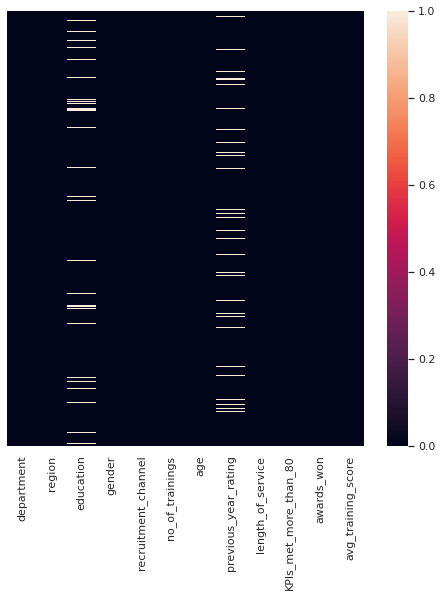

In [14]:
# heatmap de valores faltantes
sns.heatmap(dataset.isnull(), yticklabels=False)

La grafica nos muestra que los valores faltantes en ambas variables no estan relacionados, es decir, donde hay un missing en una hay un valor en la otra. Son aleatorios.

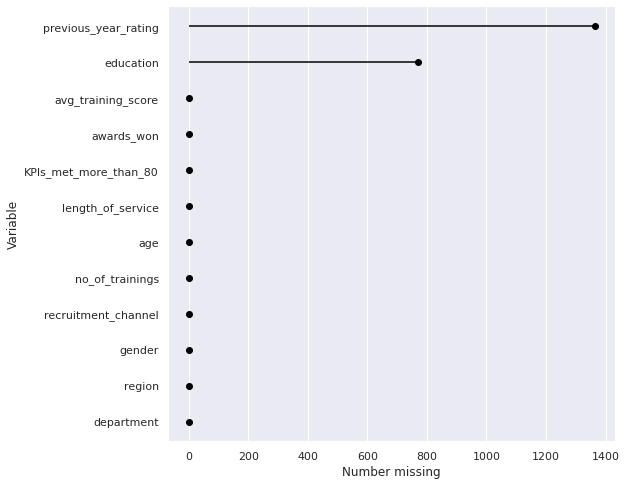

In [15]:
# Grafico de Paleta de los valores faltantes
dataset.missing.missing_variable_plot()

Vemos que hay alrededor de 800 missing en *education* y casi 1400 en *previous_year_rating*.

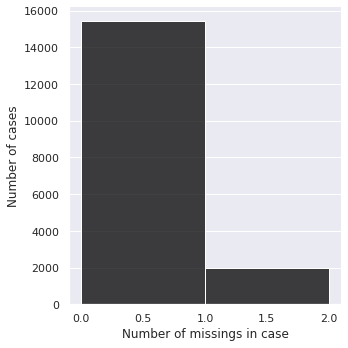

In [16]:
# Histograma de observaciones con datos faltantes
dataset.missing.missing_case_plot()

La grafica nos muestra que existen mas de 15 mil observaciones con 1 solo missing, mientras que hay casi 2 mil registros con 2 missing.

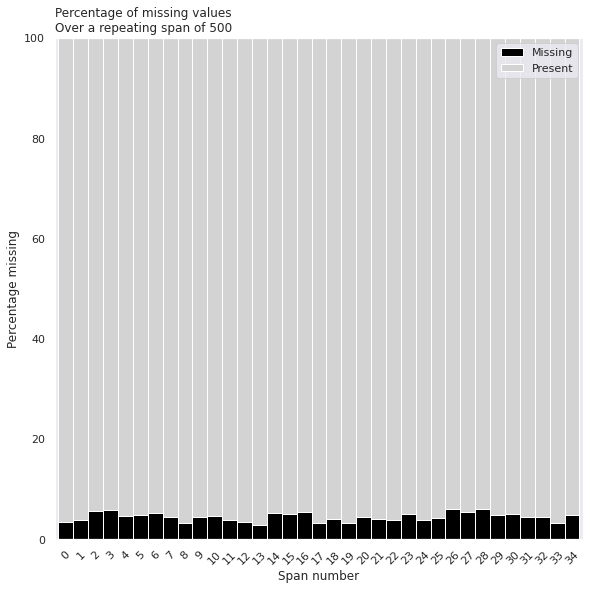

In [17]:
# Visualizacion de missing para rango especificos de una variable especifica
(
    dataset
    .missing
    .missing_variable_span_plot(
        variable='education',
        span_every=500,
        rot=45
    )
)

La grafica nos muestra que en el rango de 1000 a 2000 registros es donde hay una mayor cantidad missing con alrededor de 10. Sin embargo, para cada intervalo hay una cantidad similar de missing. 

## Eliminacion de valores faltantes

In [18]:
# Eliminamos registros duplicados
data = data.drop_duplicates()

# Eliminamos registros con valores nulos
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [20]:
print("Registros Duplicados: ", data.duplicated().sum())
print("="*40)
print("Las diemnsiones de la data son: ", data.shape)

Registros Duplicados:  0
Las diemnsiones de la data son:  (15416, 12)


## Tratamiento de la variable objetivo

In [21]:
# La variable objetivo es region
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...
17410,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
17411,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
17412,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [22]:
# En la columna region, solo dejamos los valores numericos
data['region'] = data['region'].str.extract('(\d+)')
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,HR,4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...
17410,Sales & Marketing,31,Bachelors,m,other,1,42,3.0,10,0,0,53
17411,Sales & Marketing,25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
17412,Technology,7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,HR,7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [23]:
# Tipos de datos de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15416 entries, 1 to 17416
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             15416 non-null  object 
 1   region                 15416 non-null  object 
 2   education              15416 non-null  object 
 3   gender                 15416 non-null  object 
 4   recruitment_channel    15416 non-null  object 
 5   no_of_trainings        15416 non-null  int64  
 6   age                    15416 non-null  int64  
 7   previous_year_rating   15416 non-null  float64
 8   length_of_service      15416 non-null  int64  
 9   KPIs_met_more_than_80  15416 non-null  int64  
 10  awards_won             15416 non-null  int64  
 11  avg_training_score     15416 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.5+ MB


In [24]:
# convertimos los valores de region a numerico
data['region'] = pd.to_numeric(data['region'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15416 entries, 1 to 17416
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             15416 non-null  object 
 1   region                 15416 non-null  int64  
 2   education              15416 non-null  object 
 3   gender                 15416 non-null  object 
 4   recruitment_channel    15416 non-null  object 
 5   no_of_trainings        15416 non-null  int64  
 6   age                    15416 non-null  int64  
 7   previous_year_rating   15416 non-null  float64
 8   length_of_service      15416 non-null  int64  
 9   KPIs_met_more_than_80  15416 non-null  int64  
 10  awards_won             15416 non-null  int64  
 11  avg_training_score     15416 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.5+ MB


## Distribucion de Genero

### Cantidad de Genero

In [25]:
# conteo de genero
gender_counts = data['gender'].value_counts()
gender_counts

m    10806
f     4610
Name: gender, dtype: int64

In [26]:
male_count = (data['gender'] == 'm').sum()
female_count = (data['gender'] == 'f').sum()

print('Total de empleados hombres: ',male_count)
print('Total de empleados mujeres: ', female_count)

Total de empleados hombres:  10806
Total de empleados mujeres:  4610


### Pie chart de genero

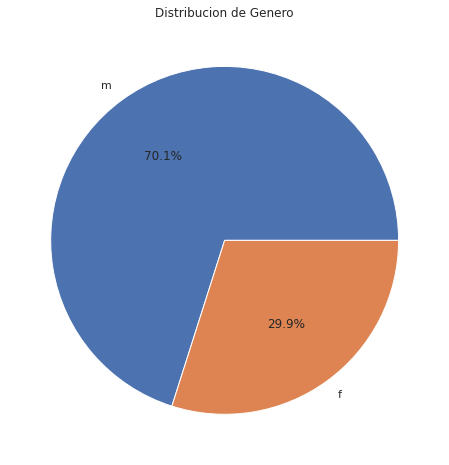

In [27]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribucion de Genero');

## Distribucion Canales de Reclutamiento

### Cantidad por canales

In [28]:
recruit_counts = data['recruitment_channel'].value_counts()
recruit_counts

other       8656
sourcing    6473
referred     287
Name: recruitment_channel, dtype: int64

In [29]:
other_count = (data['recruitment_channel'] == 'other').sum()
sourcing_count = (data['recruitment_channel'] == 'sourcing').sum()
referred_count = (data['recruitment_channel'] == 'referred').sum()

print('Cantidad de empleado que ingresaron por referencia: ', referred_count)
print('Cantidad de empleado que ingresaron por propia cuenta: ', sourcing_count)
print('Cantidad de empleado que ingresaron por otro metodo: ', other_count)

Cantidad de empleado que ingresaron por referencia:  287
Cantidad de empleado que ingresaron por propia cuenta:  6473
Cantidad de empleado que ingresaron por otro metodo:  8656


### Pie char de canales de reclutamiento

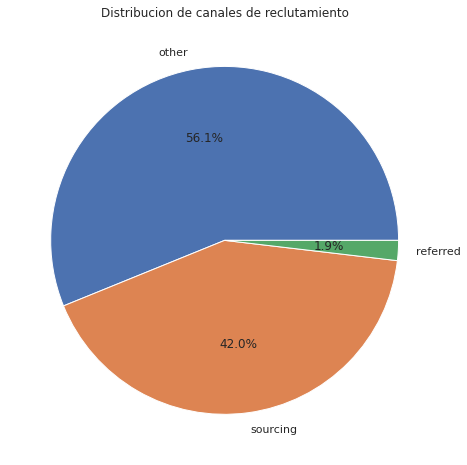

In [30]:
plt.pie(recruit_counts, labels= recruit_counts.index, autopct='%1.1f%%')
plt.title('Distribucion de canales de reclutamiento');

## Nivel educativo segun el genero

### Cantidad por Nivel Educativo

In [31]:
# Conteo segun eduacion
basic_count = (data['education'] == 'Below Secondary').sum()
bach_count = (data['education'] == 'Bachelors').sum()
mast_count = (data['education'] == 'Masters & above').sum()

print(f'Nivel educativo Basico: {basic_count} empleados')
print(f'Nivel educativo Bachillerato: {bach_count} empleados')
print(f'Nivel educativo Maestria: {mast_count} empleados')

Nivel educativo Basico: 168 empleados
Nivel educativo Bachillerato: 10459 empleados
Nivel educativo Maestria: 4789 empleados


### Visualizacion de nivel educativo segun el genero

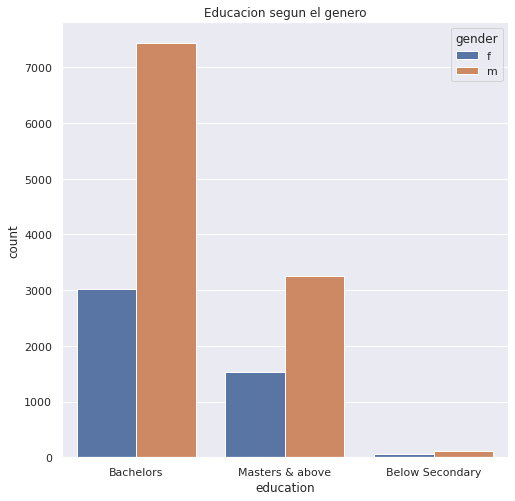

In [32]:
sns.countplot(data=data, x=data['education'], hue=data['gender'])
plt.title('Educacion segun el genero');

## Cumplimiento de KPIs

### Tasa de KPIs

In [33]:
# Conteo de empleados segun el cumplimiento de mas del 80% de KPIs
KPI_counts = data['KPIs_met_more_than_80'].value_counts()
KPI_counts

0    9841
1    5575
Name: KPIs_met_more_than_80, dtype: int64

In [34]:
cumplen = (data['KPIs_met_more_than_80'] == 1).sum()
no_cumplen = (data['KPIs_met_more_than_80'] == 0).sum()

total = cumplen + no_cumplen
pct_cumplen = (cumplen/total)*100
pct_no_cumplen = (no_cumplen/total)*100
print(f'Tasa de cumplimiento de KPIs : \n- {pct_no_cumplen:.2f}% de los empleados no cumplen con mas del 80% de los KPIs\n- {pct_cumplen:.2f}% de los empleados cumplen con mas del 80% de los KPIs')

Tasa de cumplimiento de KPIs : 
- 63.84% de los empleados no cumplen con mas del 80% de los KPIs
- 36.16% de los empleados cumplen con mas del 80% de los KPIs


### Visualizacion de cumplimiento de KPIs

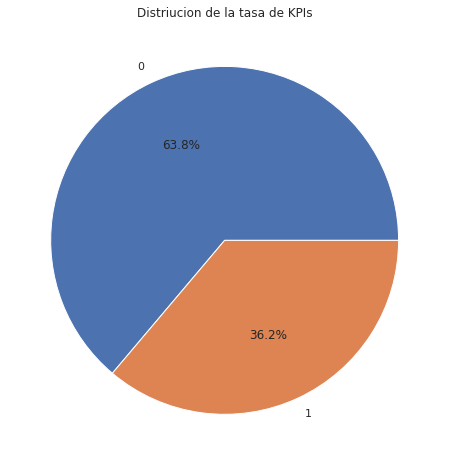

In [35]:
plt.pie(KPI_counts, labels=KPI_counts.index, autopct='%1.1f%%')
plt.title('Distriucion de la tasa de KPIs');

## Distribucion de Edad

In [36]:
# Estadistica basica sobre edad
data['age'].agg(['min','mean','median','max','std','skew']).to_frame().T

,min,mean,median,max,std,skew
age,20.0,35.633044,34.0,60.0,7.576211,0.991874


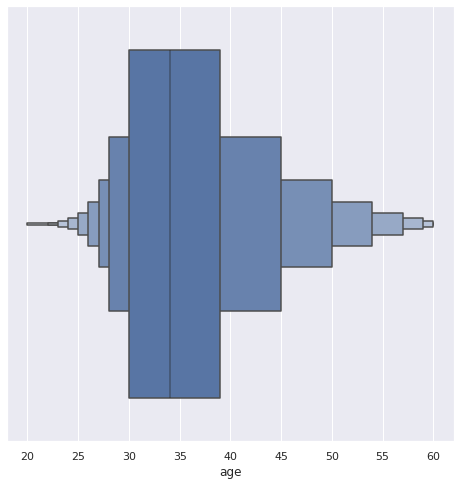

In [37]:
# Visualizacion de la distribucion de edad
sns.boxenplot(x=data['age']);

La grafica indica que el rango de edad de la mayoria de los empleado esta entre los 30 y 39 años.

## Distribucion de la Duracion en el trabajo

In [38]:
data['length_of_service'].agg(['min','mean','median','max','std','skew']).to_frame().T

,min,mean,median,max,std,skew
length_of_service,1.0,6.258108,5.0,34.0,4.115144,1.751104


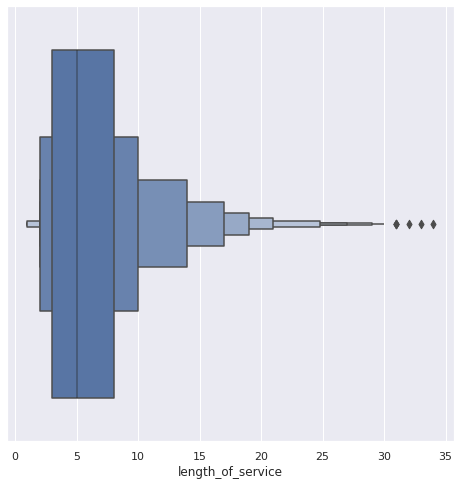

In [39]:
# visualizacion de duracion del servicio
sns.boxenplot(x=data['length_of_service']);

## Distribucion del tiempo de capacitacion

In [40]:
# Estadistica basica del tiempo de entrenamiento
data['no_of_trainings'].agg(['min','mean','median','max','std','skew']).to_frame().T

,min,mean,median,max,std,skew
no_of_trainings,1.0,1.2476,1.0,9.0,0.588676,3.404001


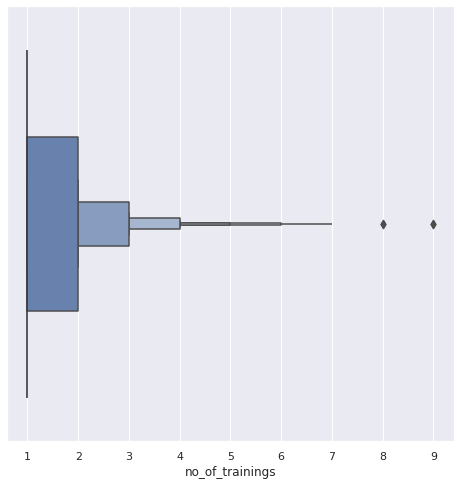

In [41]:
# Distribucion del tiempo de entrenamiento
sns.boxenplot(x=data['no_of_trainings']);

## Distribucion del puntaje promedio de capacitacion

In [42]:
# estadistica basica del puntaje promedio de capacitacion
data['avg_training_score'].agg(['min','mean','median','max','std','skew']).to_frame().T

,min,mean,median,max,std,skew
avg_training_score,39.0,63.365919,60.0,99.0,13.300145,0.451742


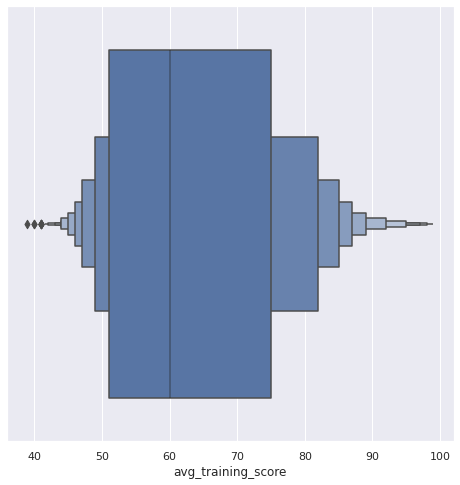

In [43]:
# Distribucion
sns.boxenplot(x=data['avg_training_score']);

## Empleados por regiones

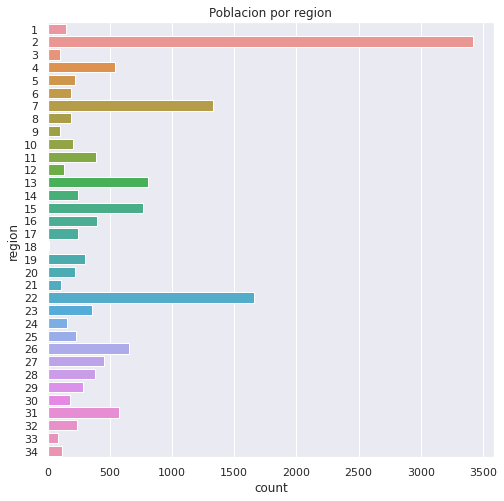

In [44]:
# Visualizacion
sns.countplot(data=data, y='region')
plt.title('Poblacion por region');

## Empleados por departamento

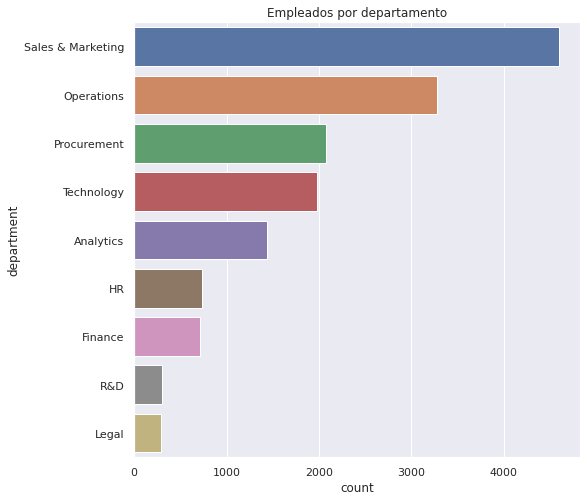

In [45]:
# obtener solo los nombres de los departamentos
order = data['department'].value_counts().index

# visualizacion
sns.countplot(data=data, y='department', order=order)
plt.title('Empleados por departamento');

## Puntaje promedio de capacitacion por departamento

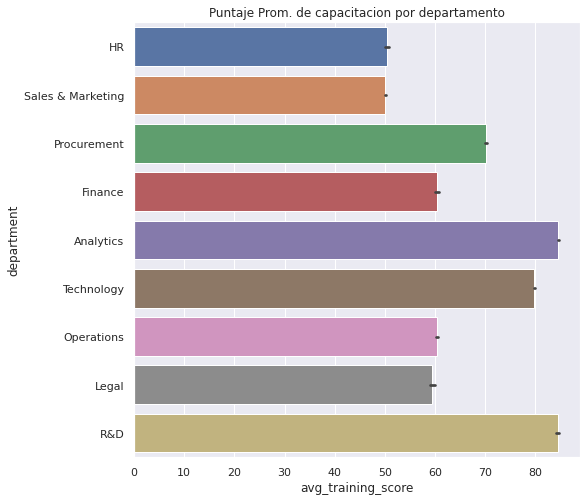

In [46]:
sns.barplot(data=data, x='avg_training_score', y='department')
plt.title('Puntaje Prom. de capacitacion por departamento');

## Tasa de KPIs por Departamento

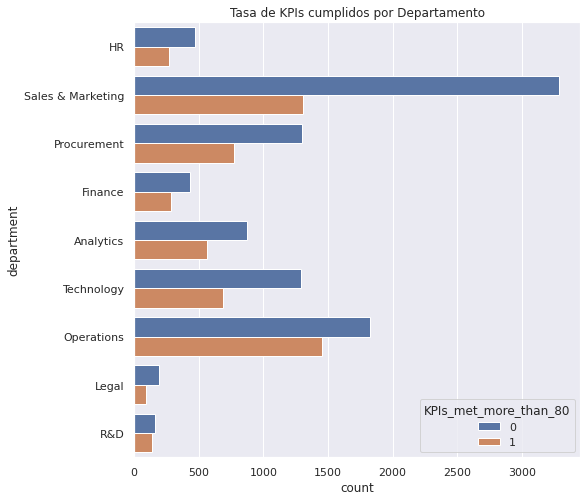

In [47]:
sns.countplot(data=data, y="department", hue="KPIs_met_more_than_80")
plt.title('Tasa de KPIs cumplidos por Departamento');

## Analisis del Departamento de Marketing y ventas

In [48]:
# Agrupamos los datos por departamento
grouped = data.groupby('department')

# obtener las filas de solamente el departamento de Marketing y ventas
sales_marketing_data = grouped.get_group('Sales & Marketing')
sales_marketing_data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
2,Sales & Marketing,13,Bachelors,m,other,1,31,1.0,4,0,0,47
10,Sales & Marketing,16,Bachelors,m,sourcing,2,40,5.0,12,1,0,50
11,Sales & Marketing,17,Masters & above,m,sourcing,1,40,3.0,10,0,0,46
12,Sales & Marketing,4,Masters & above,f,other,1,34,3.0,4,0,0,52
15,Sales & Marketing,7,Bachelors,m,sourcing,1,31,4.0,4,1,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...
17404,Sales & Marketing,1,Bachelors,f,sourcing,1,28,3.0,2,1,0,46
17406,Sales & Marketing,25,Masters & above,m,sourcing,1,39,5.0,9,1,0,51
17408,Sales & Marketing,24,Bachelors,m,sourcing,1,26,2.0,2,0,0,44
17410,Sales & Marketing,31,Bachelors,m,other,1,42,3.0,10,0,0,53


### Cantidad empleados por genero

In [49]:
smale_count = (sales_marketing_data['gender'] == 'm').sum()
sfemale_count = (sales_marketing_data['gender'] == 'f').sum()

print('el total de empleado hombres en Sales/Marketing es de: ',smale_count)
print('el total de empleado mujeres en Sales/Marketing es de: ',sfemale_count)

el total de empleado hombres en Sales/Marketing es de:  3711
el total de empleado mujeres en Sales/Marketing es de:  888


### Grafica de empleados por genero

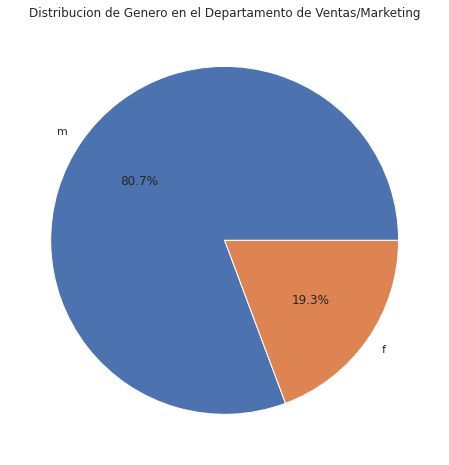

In [50]:
# conteo de generos del departamento de ventas y marketing
sgender_count = sales_marketing_data['gender'].value_counts()

# Grafico
plt.pie(sgender_count, labels=sgender_count.index, autopct='%1.1f%%')
plt.title('Distribucion de Genero en el Departamento de Ventas/Marketing');

### Distribucion de la Duracion del trabajo

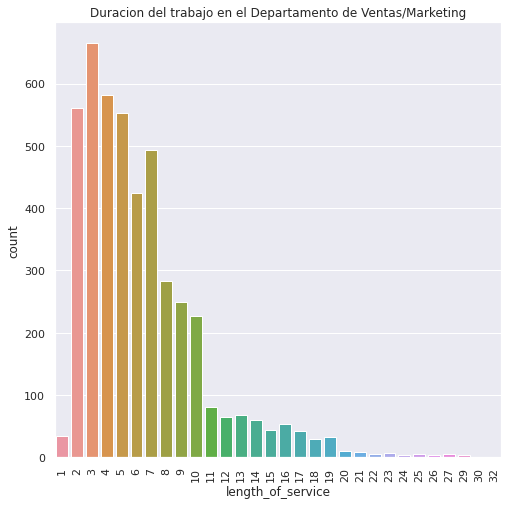

In [51]:
sns.countplot(data=sales_marketing_data, x='length_of_service')
plt.xticks(rotation=90)
plt.title('Duracion del trabajo en el Departamento de Ventas/Marketing');

### Calificacion del año en Ventas y Marketing

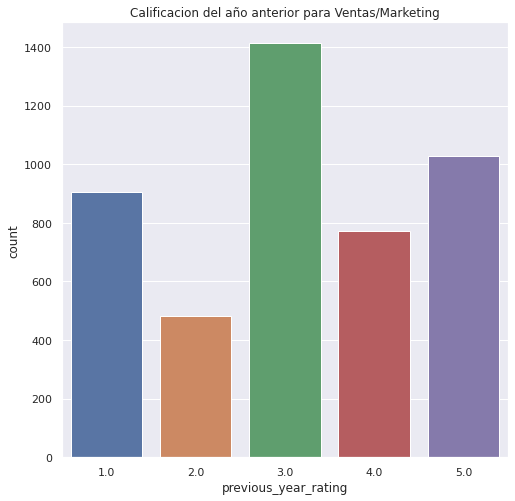

In [52]:
sns.countplot(data=sales_marketing_data, x='previous_year_rating')
plt.title('Calificacion del año anterior para Ventas/Marketing');

## Analisis empleados por premios ganados

In [53]:
# agrupamos la data por premios ganados
grouped = data.groupby('awards_won')

# obtenemos los empleados que hayan ganado premios
award_won_data = grouped.get_group(1)

# mostramos registros
award_won_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
25,Operations,20,Bachelors,m,other,1,33,3.0,7,1,1,62
124,Technology,31,Masters & above,m,other,1,39,5.0,4,0,1,81
262,Procurement,15,Bachelors,m,other,1,38,4.0,2,1,1,97
293,Procurement,31,Masters & above,f,other,1,37,3.0,2,1,1,97
298,Operations,4,Masters & above,f,sourcing,2,36,1.0,6,1,1,65


### Premios ganados por Genero

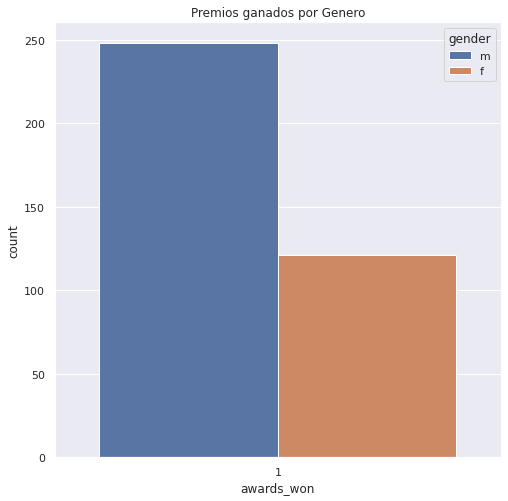

In [54]:
# Plot
sns.countplot(data=award_won_data, x='awards_won', hue='gender')
plt.title('Premios ganados por Genero');

### Premios ganados por Edad

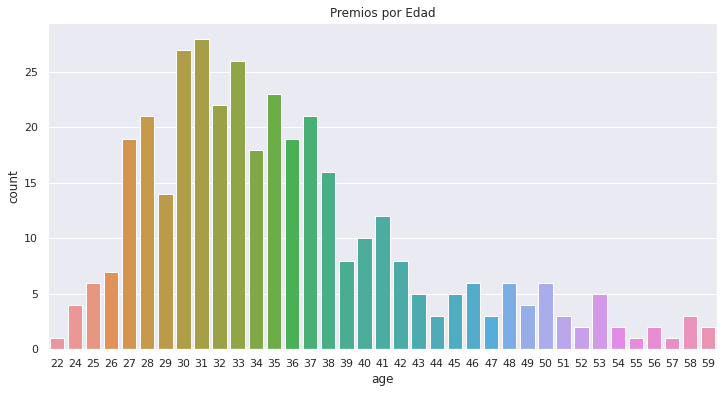

In [55]:
# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=award_won_data, x='age')
plt.title('Premios por Edad');

## Analisis de empleados que lograron mas del 80% de los KPIs

In [56]:
# agrupar datos
grouped = data.groupby('KPIs_met_more_than_80')

# Obtener empleados que hayan cumplido con la meta
kpi_data = grouped.get_group(1)

# mostrar registros
kpi_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
6,Finance,2,Bachelors,m,other,1,33,5.0,3,1,0,57
9,Technology,22,Bachelors,m,sourcing,1,29,5.0,2,1,0,76
10,Sales & Marketing,16,Bachelors,m,sourcing,2,40,5.0,12,1,0,50
14,Operations,11,Bachelors,m,sourcing,1,30,5.0,6,1,0,58
15,Sales & Marketing,7,Bachelors,m,sourcing,1,31,4.0,4,1,0,47


### KPIs logrados por Genero

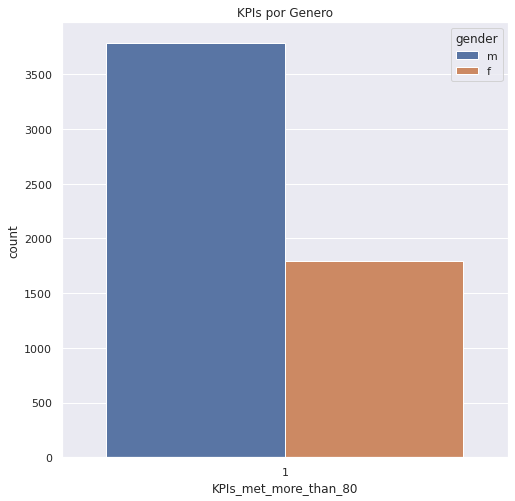

In [57]:
# Plot
sns.countplot(data=kpi_data, x='KPIs_met_more_than_80', hue='gender')
plt.title('KPIs por Genero');

### KPIs logrados por Edad

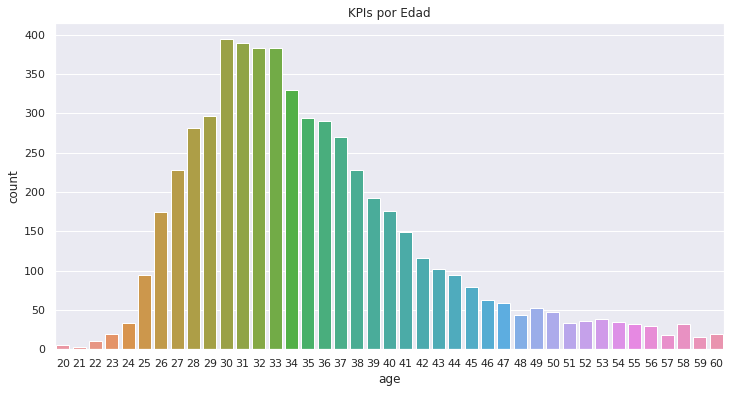

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(data=kpi_data, x='age')
plt.title('KPIs por Edad');

## Analisis de la Frecuencia de distribucion de las variables

### Distribucion de Edad

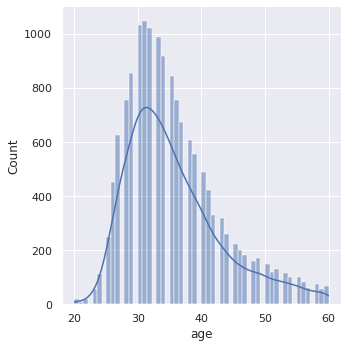

In [59]:
sns.displot(data=data, x='age', kde=True);

### Distribucion de Duracion en el trabajo

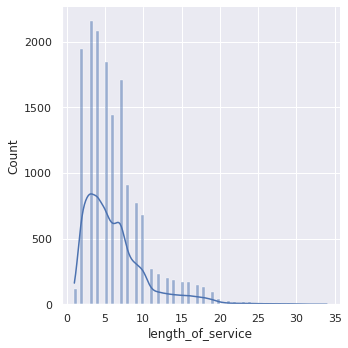

In [60]:
sns.displot(data=data, x='length_of_service', kde=True);

### Distribucion del Puntaje de Capacitacion

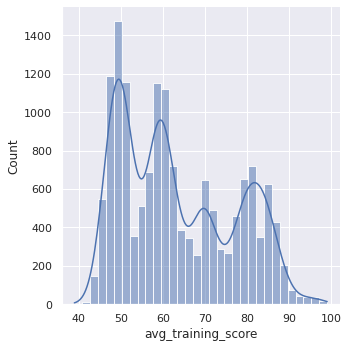

In [61]:
sns.displot(data=data, x='avg_training_score', kde=True);

### Distribucion de la Region segun KPIs logrados

<Figure size 864x432 with 0 Axes>

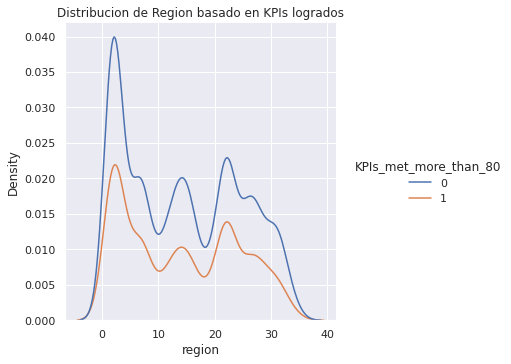

In [62]:
plt.figure(figsize=(12,6))
sns.displot(data=data, x='region', kind='kde', hue='KPIs_met_more_than_80')
plt.title('Distribucion de Region basado en KPIs logrados');

### Distribucion de Region segun la Educacion

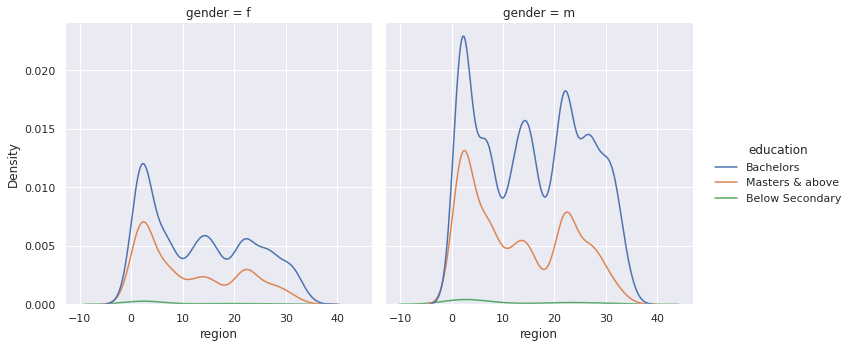

In [63]:
sns.displot(data=data, x='region', hue='education', col='gender', kind='kde');

### Distribucion de Edad segun el Departamento y el Genero

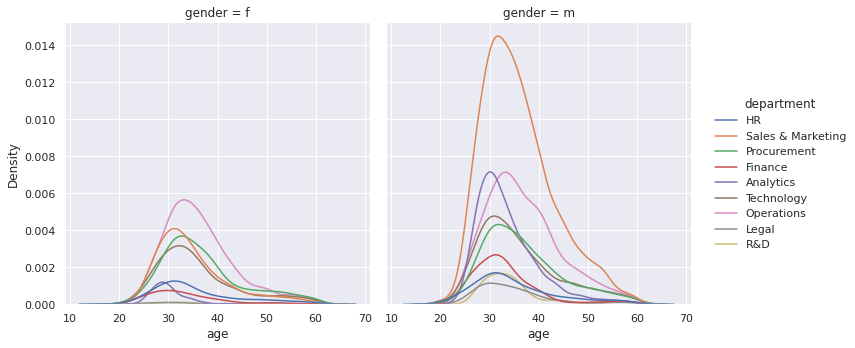

In [64]:
sns.displot(data=data, x='age', hue='department', col='gender', kind='kde');

### distribucion de Puntaje de capacitacion por departamento

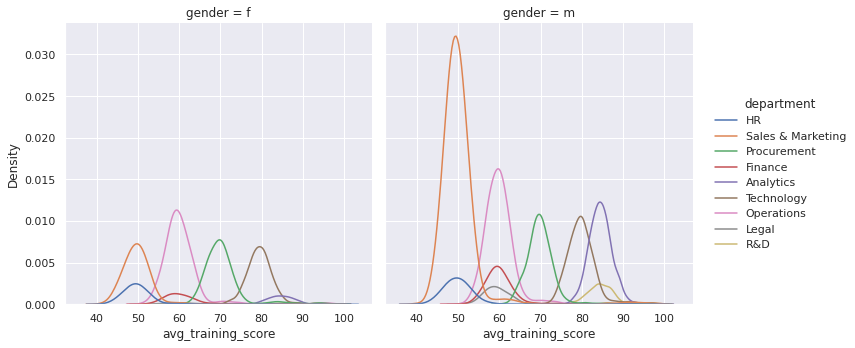

In [65]:
sns.displot(data=data, x='avg_training_score', hue='department', col='gender', kind='kde');

## Analisis de correlacion

### Duracion del trabajo vs Edad basado en el cumplimento de KPIs

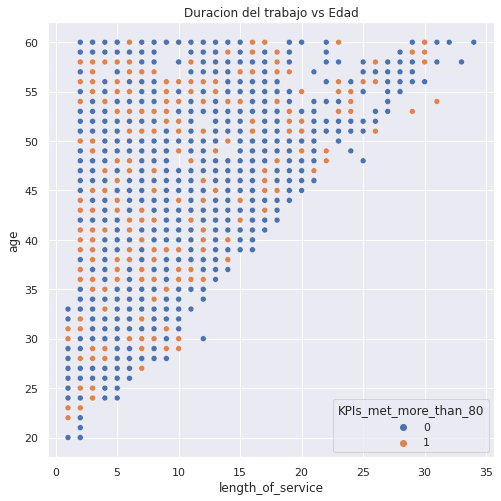

In [66]:
# Plot
sns.scatterplot(data=data, x='length_of_service', y='age', hue='KPIs_met_more_than_80')
plt.title('Duracion del trabajo vs Edad');

### Edad vs Duracion del trabajo basado en el Genero

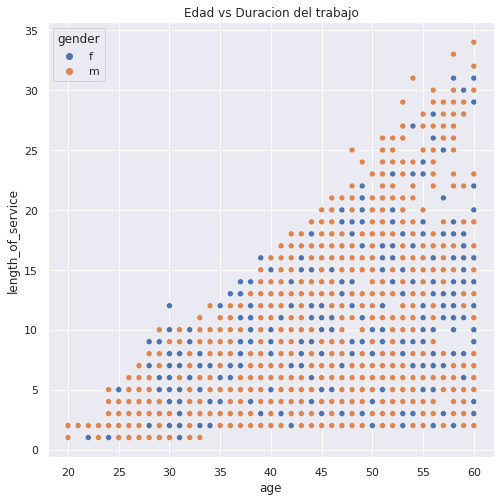

In [67]:
sns.scatterplot(data=data, x='age', y='length_of_service', hue='gender')
plt.title('Edad vs Duracion del trabajo');

### Puntaje de capacitacion vs Duracion del trabajo basado en el Genero

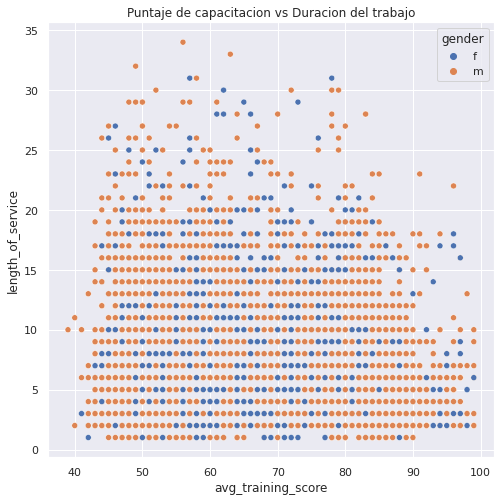

In [68]:
sns.scatterplot(data=data, x='avg_training_score', y='length_of_service', hue='gender')
plt.title('Puntaje de capacitacion vs Duracion del trabajo');

### Correlacion entre dos variables numericas y 3 categoricas

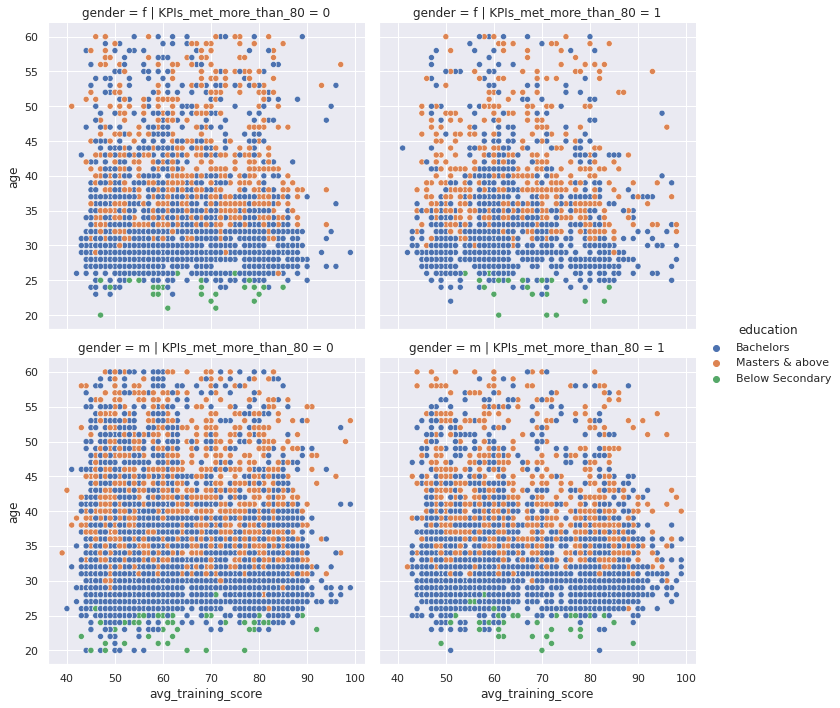

In [69]:
# variables numericas: avg_training_score, age
# variables categoricas: education, KPIs_met_more_than_80, gender

sns.relplot(data=data, x='avg_training_score', y='age', hue='education', col='KPIs_met_more_than_80', row='gender');

### Matriz de correlacion

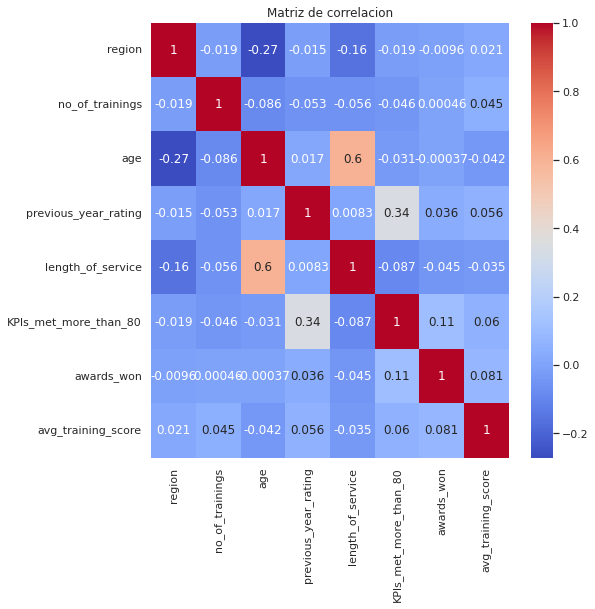

In [70]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion');

## Procesamiento de la data


### Copia de los datos

In [71]:
# Creamos una copia de los datos
df = data.copy()
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,HR,4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...
17410,Sales & Marketing,31,Bachelors,m,other,1,42,3.0,10,0,0,53
17411,Sales & Marketing,25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
17412,Technology,7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,HR,7,Bachelors,m,other,1,33,1.0,9,0,0,51


### Eliminar variables no relevantes

In [72]:
# Eliminamos variables pocos relevantes
df = df.drop(['department', 'recruitment_channel'], axis=1)
df

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,4,Bachelors,f,1,31,3.0,5,0,0,51
2,13,Bachelors,m,1,31,1.0,4,0,0,47
3,2,Bachelors,f,3,31,2.0,9,0,0,65
4,29,Bachelors,m,1,30,4.0,7,0,0,61
5,7,Bachelors,m,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...
17410,31,Bachelors,m,1,42,3.0,10,0,0,53
17411,25,Bachelors,m,2,28,2.0,5,0,0,45
17412,7,Bachelors,f,2,30,5.0,6,1,0,81
17413,7,Bachelors,m,1,33,1.0,9,0,0,51


### Convertir variables categoricas a numericas

In [73]:
# librerias
from sklearn.preprocessing import LabelEncoder

# Utilizamos esta transformada para variables es Binaria
# creamos una clase LabelEncoder
le = LabelEncoder()

# pasamos la variable a convertir a la clase antes definida
df['gender'] = le.fit_transform(df['gender'])

# mostramos resultados
df.head()

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,4,Bachelors,0,1,31,3.0,5,0,0,51
2,13,Bachelors,1,1,31,1.0,4,0,0,47
3,2,Bachelors,0,3,31,2.0,9,0,0,65
4,29,Bachelors,1,1,30,4.0,7,0,0,61
5,7,Bachelors,1,1,36,3.0,2,0,0,68


In [74]:
# Seleccion de variables predictoras
X = df.drop('KPIs_met_more_than_80', axis=1).values

# Seleccion de variable objetivo
y = df['KPIs_met_more_than_80'].values

X

array([[4, 'Bachelors', 0, ..., 5, 0, 51],
       [13, 'Bachelors', 1, ..., 4, 0, 47],
       [2, 'Bachelors', 0, ..., 9, 0, 65],
       ...,
       [7, 'Bachelors', 0, ..., 6, 0, 81],
       [7, 'Bachelors', 1, ..., 9, 0, 51],
       [7, 'Bachelors', 0, ..., 4, 0, 81]], dtype=object)

In [75]:
# Librerias
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [76]:
# Para variables categoricas de mas de dos valores utilizamos la transformacion OneHot
# Transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

# Aplicamos el Transformer sobre las variables predictoras
X = np.array(ct.fit_transform(X))

X

array([[1.0, 0.0, 0.0, ..., 5, 0, 51],
       [1.0, 0.0, 0.0, ..., 4, 0, 47],
       [1.0, 0.0, 0.0, ..., 9, 0, 65],
       ...,
       [1.0, 0.0, 0.0, ..., 6, 0, 81],
       [1.0, 0.0, 0.0, ..., 9, 0, 51],
       [1.0, 0.0, 0.0, ..., 4, 0, 81]], dtype=object)

### Seleccion de features relevantes

In [77]:
# Librerias
from sklearn.feature_selection import SelectKBest, f_regression

In [82]:
# Reemplazamos los features con los nombres reales de las variables predictoras
feature_names = ['region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met_more_than_80', 'awards_won', 'avg_training_score']

# creamos el objeto SelectKBest con f_regression scoring y k = 5
# k representa la catidad de variables que deseamos
selector = SelectKBest(score_func=f_regression, k=5)
# ajustamos el selector a los datos
selector.fit(X,y)

SelectKBest(k=5, score_func=<function f_regression at 0x7ff00eda6950>)

In [79]:
# Obtenemos la matriz de features transformada con solo las 5 features principales seleccionadas
X_selected = selector.transform(X)
X_selected

array([[1, 3.0, 5, 0, 51],
       [1, 1.0, 4, 0, 47],
       [3, 2.0, 9, 0, 65],
       ...,
       [2, 5.0, 6, 0, 81],
       [1, 1.0, 9, 0, 51],
       [1, 5.0, 4, 0, 81]], dtype=object)

In [80]:
# obtenemos el indice de los features seleccionados
selected_indices = selector.get_support(indices=True)
selected_indices

array([ 5,  7,  8,  9, 10])

In [81]:
# obtenemos los nombres de los features seleccionados de la lista de nombre de las variables originales
selected_features_names = [feature_names[idx] for idx in selected_indices]

# mostramos features
print('Top nombre de los features seleccionados:')
print(selected_features_names)

Top nombre de los features seleccionados:
['age', 'length_of_service', 'KPIs_met_more_than_80', 'awards_won', 'avg_training_score']


### Dividir los datos en entrenamiento y de prueba

In [83]:
# libreria
from sklearn.model_selection import train_test_split

In [84]:
# dividimos los datos en dos grupos y guradamos en variables
# test_size: indica el tamano del grupo de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [85]:
X_train

array([[1.0, 0.0, 0.0, ..., 13, 0, 59],
       [1.0, 0.0, 0.0, ..., 2, 0, 58],
       [1.0, 0.0, 0.0, ..., 5, 0, 73],
       ...,
       [1.0, 0.0, 0.0, ..., 3, 0, 51],
       [1.0, 0.0, 0.0, ..., 5, 0, 63],
       [1.0, 0.0, 0.0, ..., 3, 0, 60]], dtype=object)

Los valores de entrenamiento no estan normalizados. Vamos a normalizarlo!

In [86]:
# libreria
from sklearn.preprocessing import StandardScaler

In [87]:
# Creamos el objeto Scalador
sc = StandardScaler()

# Normalizamos los valores de entrenamiento y de prueba
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 0.69210675, -0.10869637, -0.67372278, ...,  1.62112741,
        -0.15736318, -0.32996384],
       [ 0.69210675, -0.10869637, -0.67372278, ..., -1.03112885,
        -0.15736318, -0.40496088],
       [ 0.69210675, -0.10869637, -0.67372278, ..., -0.30778623,
        -0.15736318,  0.71999464],
       ...,
       [ 0.69210675, -0.10869637, -0.67372278, ..., -0.79001464,
        -0.15736318, -0.92994012],
       [ 0.69210675, -0.10869637, -0.67372278, ..., -0.30778623,
        -0.15736318, -0.0299757 ],
       [ 0.69210675, -0.10869637, -0.67372278, ..., -0.79001464,
        -0.15736318, -0.25496681]])

## Modelo de Clasificacion

Vamos a utilizar el modelo de regresion logistica.

In [88]:
# Librerias
from sklearn.linear_model import LogisticRegression

In [89]:
# creamos un objeto con el modelo
classifier_lg = LogisticRegression(random_state=0)

# ajustamos el modelo a los datos de entrenamiento
classifier_lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [91]:
# Creamos el predictor
y_pred = classifier_lg.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])